# Introducción

Incluso el código mejor escrito contendrá errores. Los errores pueden producirse debido a actualizaciones, archivos movidos u otros cambios inesperados. Afortunadamente, Python ofrece una amplia compatibilidad para el seguimiento y el control de errores.

## Escenario: Creación de un programa de cohetes

Imagina que es un desarrollador que está creando un programa para un cohete. El programa debe leer un archivo de configuración para asegurarse de que se carga la configuración adecuada. La lectura del archivo puede producir un error si falta el archivo o tiene otros problemas. En este módulo, explorarás cómo crear el programa.

## ¿Qué descubrirás?

Al término de este módulo, sabrás hacer lo siguiente:

* Leer y usar la salida de errores de las excepciones
  Controlar correctamente las excepciones
* Generar excepciones con mensajes de error útiles
* Usar excepciones para controlar el flujo de un programa

## ¿Cuál es el objetivo principal?

En este módulo, descubrirás cómo usar la salida de excepción para la depuración, cómo detectar y generar excepciones, y cómo afecta a la lógica de un programa cuando se producen excepciones.

---

## Uso de tracebacks para buscar errores

Las excepciones en Python son una característica principal del lenguaje. Es posible que te sorprenda leer que algo que genera errores se resalta como una característica. Esta sorpresa puede deberse a que las herramientas de software sólidas no parecen bloquearse con un traceback *seguimiento* (varias líneas de texto que indican cómo se inició y finalizó el error).

Sin embargo, las excepciones son útiles porque ayudan en la toma de decisiones generando mensajes de error descriptivos. Pueden ayudarte a controlar los problemas esperados e inesperados.

## Tracebacks

Un traceback es el cuerpo del texto que puede apuntar al origen (y al final) de un error no controlado. Comprender los componentes de un traceback hará que seas más eficaz al corregir errores o depurar un programa que no funciona bien.

La primera vez que encuentres excepciones en Python podrías verte tentado/a a evitar el error suprimiéndolo. Cuando un programa sufre un error no controlado, aparece un traceback como salida. Como verás en este módulo, los tracebacks son útiles. Hay maneras de controlar correctamente los errores para que no aparezcan o muestren información útil.

Si intentamos en un notebook, abrir un archivo inexistente sucede lo siguiente:

In [4]:
open("C:/Users/super/Desktop/Katas/Kata 10/capt1.png")

OSError: [Errno 22] Invalid argument: "'C:/Users/super/Desktop/Katas/Kata 10/capt1.png'"

Esa salida tiene varias partes clave. En primer lugar, el traceback menciona el orden de la salida. Después, informa de que el archivo es `stdin` (entrada en el terminal interactivo) en la primera línea de la entrada. El error es `FileNotFoundError` (el nombre de excepción), lo que significa que el archivo no existe o quizás el directorio correspondiente no existe.

Es mucha información. Puede ser difícil entender por qué la línea 1 es significativa o qué significa `Errno 2`.

Intenta crear un archivo de Python y asígnale el nombre *open.py*, con el contenido siguiente:

In [5]:
import IPython.display as display
from PIL import Image

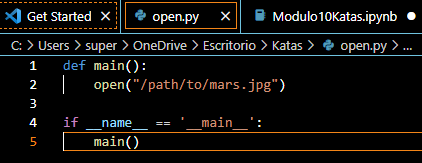

In [8]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt2.png')) 

Se trata de una sola función `main()` que abre el archivo inexistente, como antes. Al final, esta función usa un asistente de Python que indica al intérprete que ejecute la función `main()` cuando se le llama en el terminal. Ejecútala con Python y podrás comprobar el siguiente mensaje de error:

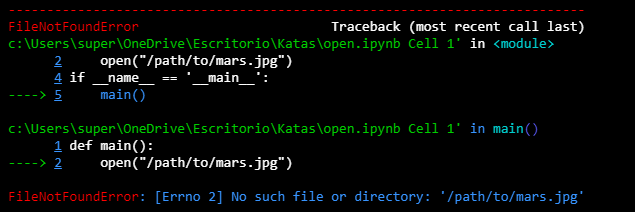

In [9]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt3.png')) 

La salida de error tiene más sentido ahora. Las rutas de acceso apuntan a un único archivo denominado *open.py*. La salida menciona que el error se inicia en la línea 5, que incluye la llamada a `main()`. A continuación, la salida sigue el error a la línea 2 en la llamada de función `open()`. Y, por último, `FileNotFoundError` notifica de nuevo que el archivo o el directorio no existen.

Los tracebacks casi siempre incluyen la información siguiente:

* Todas las rutas de acceso de archivo implicadas, para cada llamada a cada función.
* Los números de línea asociados a cada ruta de acceso de archivo.
* Los nombres de las funciones, métodos o clases implicados en la generación de una excepción.
* El nombre de la excepción que se ha producido.

## Controlando las excepciones

Cuando encuentres por primera vez excepciones que muestren tracebacks grandes como salida, es posible que te veas tentado/a a detectar todos los errores para evitar que esto suceda.

Si estás en una misión a Marte, ¿Qué podrías hacer si un texto del sistema de navegación dice 'Se ha producido un error'? Imagina que no hay ninguna más información ni contexto, simplemente una luz roja parpadeante con el texto del error. Como desarrollador, resulta útil ponerse al otro lado del programa: ¿Qué puede hacer un usuario cuando se produce un error?

Aunque en este módulo se explica cómo controlar las excepciones detectándolas, no es necesario detectar las excepciones todo el tiempo. A veces resulta útil permitir que se puedan generar excepciones para que otros autores de llamadas puedan tratar los errores.

### Try y Except de los bloques

Vamos a usar el ejemplo de navegador a fin de crear código que abra archivos de configuración para la misión de Marte. Los archivos de configuración pueden tener todo tipo de problemas, por lo que es fundamental notificarlos con precisión cuando se presenten. Sabemos que, si no existe un archivo o directorio, se genera `FileNotFoundError`. Si queremos controlar esa excepción, podemos hacerlo con un bloque try y except:

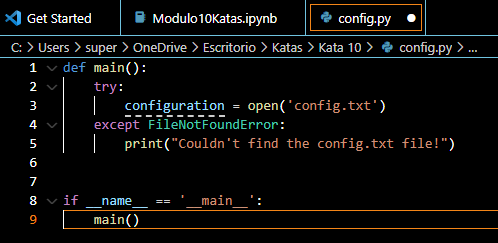

In [11]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt4.png')) 

Después de la palabra clave `try`, agregamos código que tenga la posibilidad de producir una excepción. A continuación, agregamos la palabra clave `except` junto con la posible excepción, seguida de cualquier código que deba ejecutarse cuando se produce esa condición. Puesto que config.txt no existe en el sistema, Python imprime que el archivo de configuración no está ahí. El bloque `try` y `except`, junto con un mensaje útil, evita un seguimiento y sigue informando al usuario sobre el problema.

Aunque es común un archivo que no existe, no es el único error que podemos encontrar. Los permisos de archivo no válidos pueden impedir la lectura de un archivo, incluso si este existe. Vamos a crear un archivo de Python denominado config.py. El archivo tiene código que busca y lee el archivo de configuración del sistema de navegación:

A continuación, quitamos el archivo *config.txt* y creamos un directorio denominado *config.txt*. Intentaremos llamar al archivo *config.py* para ver un error nuevo que debería ser similar al siguiente:

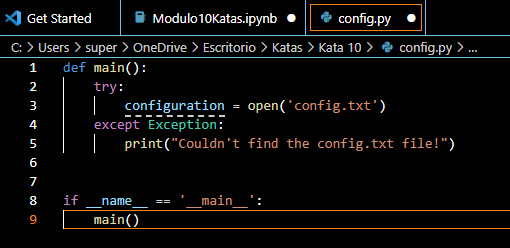

In [13]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt5.png')) 

Ahora volvemos a ejecutar el código en el mismo lugar donde existe el archivo *config.txt* con permisos incorrectos:

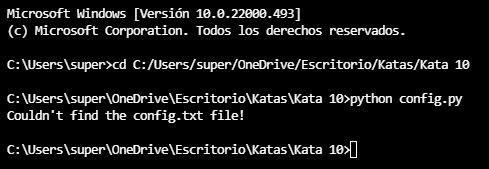

In [14]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt6.png')) 

El problema ahora es que el mensaje de error es incorrecto. El archivo existe, pero tiene permisos diferentes y Python no puede leerlo. Cuando se trata con errores de software, puede resultar frustrante tener errores que hagan lo siguiente:

* No indiquen cuál es el problema real.
* Proporcionen una salida que no coincida con el problema real.
* No sugieran lo que se puede hacer para corregir el problema.

Vamos a corregir este fragmento de código para abordar todas estas frustraciones. Revertiremos la detección de `FileNotFoundError` y luego agregamos otro bloque `except` para detectar `PermissionError`:

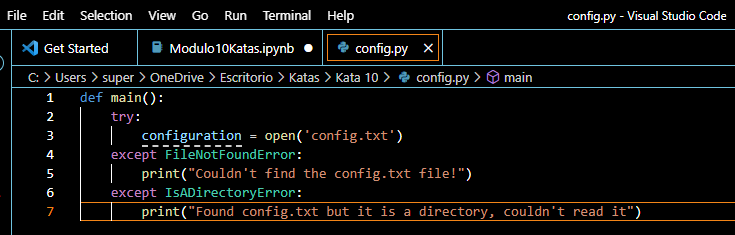

In [15]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt7.png')) 

Ahora volvemos a ejecutarlo, en el mismo lugar donde *config.txt* está con el problema de permisos:

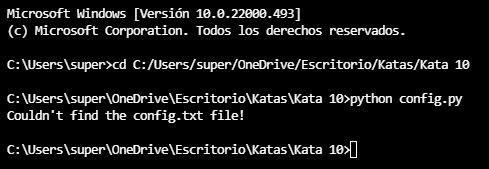

In [16]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt8.png')) 

Eliminamos el archivo config.txt para asegurarnos de que se alcanza el primer bloque `except` en su lugar:

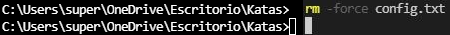

In [17]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt9.png')) 

Cuando los errores son de una naturaleza similar y no es necesario controlarlos individualmente, puedes agrupar las excepciones como una usando paréntesis en la línea `except`. Por ejemplo, si el sistema de navegación está bajo cargas pesadas y el sistema de archivos está demasiado ocupado, tiene sentido detectar `BlockingIOError` y `TimeOutError` juntos:

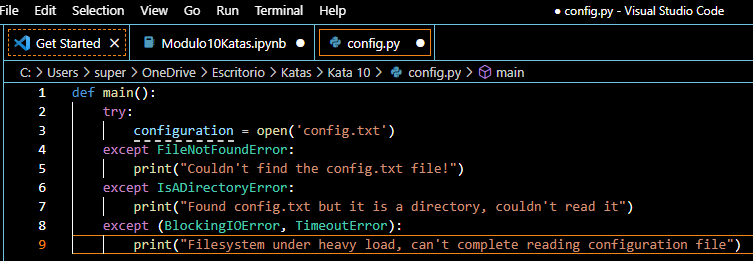

In [18]:
display.display(Image.open('C:/Users/super/OneDrive/Escritorio/Katas/Kata 10/capt10.png')) 

**Sugerencia**

Aunque puedes agrupar excepciones, solo debes hacerlo cuando no sea necesario controlarlas individualmente. Evita agrupar muchas excepciones para proporcionar un mensaje de error generalizado.

Si necesitas acceder al error asociado a la excepción, debes actualizar la línea `except` para incluir la palabra clave `as`. Esta técnica es práctica si una excepción es demasiado genérica y el mensaje de error puede ser útil:

En este caso, `as err` significa que `err` se convierte en una variable con el objeto de excepción como valor. Después, usa este valor para imprimir el mensaje de error asociado a la excepción. Otra razón para usar esta técnica es acceder directamente a los atributos del error. Por ejemplo, si detecta una excepción `OSError` más genérica, que es la excepción primaria de `FilenotFoundError` y `PermissionError`, podemos diferenciarlas mediante el atributo `.errno`:

Intenta usar siempre la técnica que proporcione la mejor legibilidad para el código y que ayude a mantenerlo en el futuro. A veces es necesario usar código menos legible para ofrecer una mejor experiencia de usuario cuando se produce un error.

## Generación de excepciones

Ahora que tienes una buena comprensión de los tracebacks y el control de excepciones, vamos a revisar la generación de excepciones.

Es posible que ya conozcas una situación que podría provocar una condición de error al escribir código. En estas situaciones, resulta útil generar excepciones que permitan que otro código comprenda cuál es el problema.

La generación de excepciones también puede ayudar en la toma de decisiones para otro código. Como hemos visto antes, en función del error, el código puede tomar decisiones inteligentes para resolver, solucionar o ignorar un problema.

Los astronautas limitan su uso de agua a unos 11 litros al día. Vamos a crear una función que, con base al número de astronautas, pueda calcular la cantidad de agua quedará después de un día o más:

In [19]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    return f"Total water left after {days_left} days is: {total_water_left} liters"

In [20]:
water_left(5,100,2)

'Total water left after 2 days is: -10 liters'

Esto no es muy útil, ya que una carencia en los litros sería un error. Después, el sistema de navegación podría alertar a los astronautas que no habrá suficiente agua para todos en dos días. Si eres un ingeniero(a) que programa el sistema de navegación, podrías generar una excepción en la función water_left() para alertar de la condición de error:

In [21]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

Ahora volvemos a ejecutarlo

In [22]:
water_left(5,100,2)

RuntimeError: There is not enough water for 5 astronauts after 2 days!

En el sistema de navegación, el código para señalar la alerta ahora puede usar `RuntimeError` para generar la alerta:

In [23]:
def water_left(astronauts, water_left, days_left):
    for argument in [astronauts, water_left, days_left]:
        try:
            # If argument is an int, the following operation will work
            argument / 10
        except TypeError:
            # TypError will be raised only if it isn't the right type 
            # Raise the same exception but with a better error message
            raise TypeError(f"All arguments must be of type int, but received: '{argument}'")
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

Ahora volvemos a intentarlo para obtener un error mejor:

In [24]:
water_left("3", "200", None)

TypeError: All arguments must be of type int, but received: '3'